<a href="https://colab.research.google.com/github/xcellentbird/Write-Call/blob/main/MNIST_%EC%88%AB%EC%9E%90%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=45)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_scaled.shape)
print(train_target.shape)
print(set(train_target))

(48000, 28, 28, 1)
(48000,)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
def model_cnn(new_layer = None):
  model = keras.Sequential()

  # CNN Layers
  ## ex) 32개의 size=(3,3)의 필터(커널) 파라미터 수는 ((3 * 3) + 1) * 32 = 320
  model.add(keras.layers.Conv2D(24, kernel_size=6, strides=1, activation= 'relu', padding='same', input_shape = (28,  28, 1))) # => 28 * 28 * 1 * 32
  model.add(keras.layers.MaxPool2D(2)) # => 14 * 14 * 1 * 32
  model.add(keras.layers.Dropout(0.25))

  ## ex) 64개의 size=(3,3)의 필터(커널) 파라미터 수는 14 * 14 * 64 = 18496???
  model.add(keras.layers.Conv2D(48, kernel_size=5, activation='relu', padding='same', strides=2)) # => 14 * 14 * 1 * 64
  model.add(keras.layers.MaxPool2D(2)) # => 7 * 7 * 1 * 64
  model.add(keras.layers.Dropout(0.25))

  model.add(keras.layers.Conv2D(64, kernel_size=4, strides=2, activation='relu', padding='same'))
  model.add(keras.layers.MaxPool2D(2)) # => 7 * 7 * 1 * 64
  model.add(keras.layers.Dropout(0.25))


  # DNN Layers
  model.add(keras.layers.Flatten()) # => 7 * 7 * 1 * 64 = 3136
  model.add(keras.layers.Dense(200, activation='relu')) # => 100
  model.add(keras.layers.Dropout(0.25)) # => 100
  model.add(keras.layers.Dense(10, activation='softmax')) # => 10

  return model

In [ ]:
model = model_cnn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 24)        888       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 24)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 48)          28848     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 48)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 48)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          4

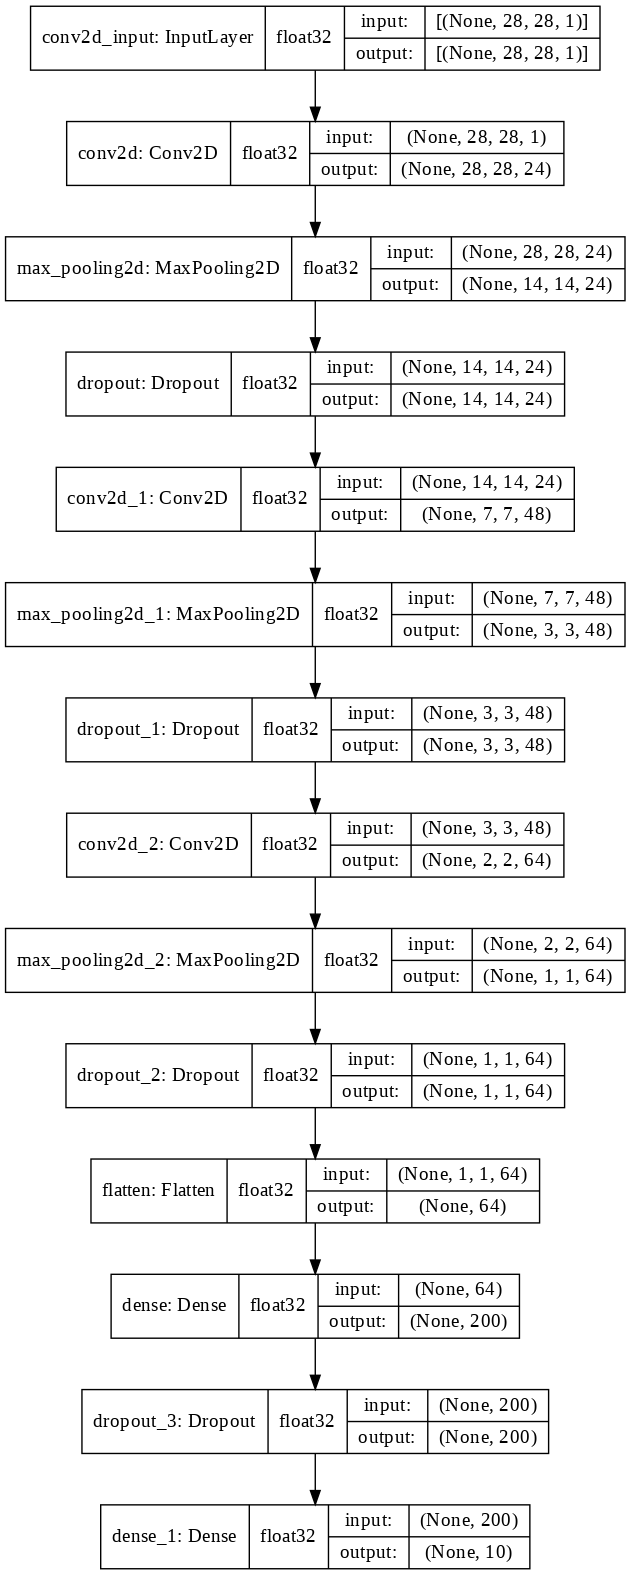

In [ ]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn_architecture.png', dpi=100, show_layer_names=True, show_dtype=True)

In [ ]:
Adam = keras.optimizers.Adam(learning_rate= 0.001)
model.compile(optimizer=Adam, loss='sparse_categorical_crossentropy', metrics='accuracy')

score = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 58s 38ms/step - loss: 0.7039 - accuracy: 0.7572 - val_loss: 0.0777 - val_accuracy: 0.9755
Epoch 2/20
1500/1500 [==============================] - 57s 38ms/step - loss: 0.1350 - accuracy: 0.9594 - val_loss: 0.0547 - val_accuracy: 0.9837
Epoch 3/20
1500/1500 [==============================] - 58s 38ms/step - loss: 0.0960 - accuracy: 0.9710 - val_loss: 0.0473 - val_accuracy: 0.9848
Epoch 4/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0854 - accuracy: 0.9744 - val_loss: 0.0441 - val_accuracy: 0.9869
Epoch 5/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.0704 - accuracy: 0.9789 - val_loss: 0.0394 - val_accuracy: 0.9887
Epoch 6/20
1500/1500 [==============================] - 57s 38ms/step - loss: 0.0670 - accuracy: 0.9800 - val_loss: 0.0357 - val_accuracy: 0.9890
Epoch 7/20
1500/1500 [==============================] - 56s 38ms/step - loss: 0.0619 - accuracy: 0.9811 - val_loss: 0.0345 -

In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 13ms/step - loss: 0.0276 - accuracy: 0.9919


[0.027608048170804977, 0.9919000267982483]

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open('mnist.tflite','wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp7zg6nnn1/assets


INFO:tensorflow:Assets written to: /tmp/tmp7zg6nnn1/assets


1337232